# COLAB TUTORIAL 3: Data Visualization with **seaborn**  


### What is seaborn?

**Seaborn** is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Data visualization is a key part of communicating your research to others. Whether via histograms, scatter plots, bar charts or pie charts, a good visualization helps unlock insights from your data.

Seaborn is another useful visualization library that is built on top of *Matplotlib*. It provides data visualizations that are typically more aesthetic and statistically sophisticated. Having a solid understanding of how to use both of these libraries is essential for any data scientist or data analyst as they both provide easy methods for visualizing data for insight.

In this hands-on notebook, you'll see how to visualize data  with Seaborn.

So, if you've never written a line of code, and you want to learn how to start making faster, more attractive plots today, you're in the right place!  To take a peek at some of the charts you'll make, check out the figures below.

![tut1_plots_you_make](https://i.imgur.com/54BoIBW.png)



---
Source/Links:
+ [Seaborn](https://seaborn.pydata.org/index.html)  
+ [Gallery/Examples](https://seaborn.pydata.org/examples/index.html)

History:  
+ 01.05.2023 v1 dbe --- initial version adapted from Kaggle "Hello Seaborn" tutorial notebooks for CAS DA6
+ Dec'2023   v2 dbe --- adapted for KETE HS23  

---

# A) Your coding environment

Take the time now to scroll quickly up and down this page.  You'll notice that there are a lot of different types of information, including:
1. **text** (like the text you're reading right now!),
2. **code** (which is always contained inside a gray box called a **code cell**), and
2. **code output** (or the printed result from running code that always appears immediately below the corresponding code).

We refer to these pages as **Jupyter notebooks** (or, often just **notebooks**), and we'll work with them throughout the mini-course.  Another example of a notebook can be found in the image below.  

![tut0_notebook](https://i.imgur.com/ccJNqYc.png)

In the notebook you're reading now, we've already run all of the code for you.  Soon, you will work with a notebook that allows you to write and run your own code!  

---   


# B) Set up the notebook

There are a few lines of code that you'll need to run at the top of every notebook to set up your coding environment.  It's not important to understand these lines of code now, and so we won't go into the details just yet.  (_Notice that it returns as output: `Setup Complete`._)

In [7]:
import pandas as pd
pd.plotting.register_matplotlib_converters()

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
print("Setup Complete")

Setup Complete


In [8]:
data = dict(ARG=10.5, FRA=10.5, GER=10.0)
df = pd.DataFrame(data, index=[0])
df
#df.info()

,ARG,FRA,GER
0,10.5,10.5,10.0


In [9]:
print(df[['ARG']])

    ARG
0  10.5


---   
# C) Load the data

In this notebook, we'll work with a dataset of historical FIFA rankings for six countries: Argentina (ARG), Brazil (BRA), Spain (ESP), France (FRA), Germany (GER), and Italy (ITA).  The dataset is stored as a CSV file (short for [comma-separated values file](https://bit.ly/2Iu5D4x). Opening the CSV file in Excel shows a row for each date, along with a column for each country.

![tut0_fifa_head](https://i.imgur.com/W0E7GjV.png)

To load the data into the notebook, we'll use two distinct steps, implemented in the code cell below as follows:
- begin by specifying the location (or [filepath](https://bit.ly/1lWCX7s)) where the dataset can be accessed, and then
- use the filepath to load the contents of the dataset into the notebook.

In [10]:
# Path of the file to read data from github repository
fifa_filepath = "https://raw.githubusercontent.com/sawubona-repo/KETE-HS23-WORK/main/zDATA/DATA_fifa.csv"

# Read the file into a (pandas dataframe) variable fifa_data
fifa_data = pd.read_csv(fifa_filepath, index_col="Date", parse_dates=True)

Note that the code cell above has **four** different lines.  

![tut0_read_csv](https://i.imgur.com/I6UEDSK.png)

---  
### Comments

Two of the lines are preceded by a pound sign (`#`) and contain text that appears faded and italicized.

Both of these lines are completely ignored by the computer when the code is run, and they only appear here so that any human who reads the code can quickly understand it.  We refer to these two lines as **comments**, and it's good practice to include them to make sure that your code is readily interpretable.

### Executable code

The other two lines are **executable code**, or code that is run by the computer (_in this case, to find and load the dataset_).

The first line sets the value of `fifa_filepath` to the location where the dataset can be accessed.  In this case, we've provided the filepath for you (in quotation marks).  _Note that the **comment** immediately above this line of **executable code** provides a quick description of what it does!_

The second line sets the value of `fifa_data` to contain all of the information in the dataset.  This is done with `pd.read_csv`.  It is immediately followed by three different pieces of text (underlined in the image above) that are enclosed in parentheses and separated by commas.  These are used to customize the behavior when the dataset is loaded into the notebook:
 - `fifa_filepath` - The filepath for the dataset always needs to be provided first.
 - `index_col="Date"` - When we load the dataset, we want each entry in the first column to denote a different row.  To do this, we set the value of `index_col` to the name of the first column (`"Date"`, found in cell A1 of the file when it's opened in Excel).
 - `parse_dates=True` - This tells the notebook to understand the each row label as a date (as opposed to a number or other text with a different meaning).

These details will make more sense soon, when you have a chance to load your own dataset in a hands-on exercise.  

> For now, it's important to remember that the end result of running both lines of code is that we can now access the dataset from the notebook by using `fifa_data`.

By the way, you might have noticed that these lines of code don't have any output (whereas the lines of code you ran earlier in the notebook returned `Setup Complete` as output).  This is expected behavior -- not all code will return output, and this code is a prime example!


---  
# D) Examine the data

Now, we'll take a quick look at the dataset in `fifa_data`, to make sure that it loaded properly.  

We print the _first_ five rows of the dataset by writing one line of code as follows:
- begin with the variable containing the dataset (in this case, `fifa_data`), and then
- follow it with `.head()`.

You can see this in the line of code below.

In [11]:
# Print the first 5 rows of the data
fifa_data.head()

,ARG,BRA,ESP,FRA,GER,ITA
Date,,,,,,
1993-08-08,5.0,8.0,13.0,12.0,1.0,2.0
1993-09-23,12.0,1.0,14.0,7.0,5.0,2.0
1993-10-22,9.0,1.0,7.0,14.0,4.0,3.0
1993-11-19,9.0,4.0,7.0,15.0,3.0,1.0
1993-12-23,8.0,3.0,5.0,15.0,1.0,2.0


In [12]:
# Print dataframe object info
fifa_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 286 entries, 1993-08-08 to 2018-06-07
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ARG     286 non-null    float64
 1   BRA     286 non-null    float64
 2   ESP     286 non-null    float64
 3   FRA     286 non-null    float64
 4   GER     286 non-null    float64
 5   ITA     286 non-null    float64
dtypes: float64(6)
memory usage: 15.6 KB


In [13]:
# Print descriptive (statistical) key measures of the dataset
fifa_data.describe()

,ARG,BRA,ESP,FRA,GER,ITA
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,5.454545,3.171329,5.321678,8.958042,5.104895,8.353147
std,4.012659,3.620897,3.908787,6.822948,4.354813,4.514822
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,1.000000,2.000000,3.000000,2.000000,4.000000
50%,5.000000,1.500000,5.000000,7.000000,4.000000,8.000000
75%,7.000000,4.000000,8.000000,15.000000,5.000000,12.000000
max,24.000000,22.000000,25.000000,27.000000,22.000000,20.000000


Check now that the first five rows agree with the image of the dataset (_from when we saw what it would look like in Excel_) above.

# E) Plot the data

In this course, you'll learn about many different plot types.  In many cases, you'll only need one line of code to make a chart!

For a sneak peek at what you'll learn, check out the code below that generates a line chart.

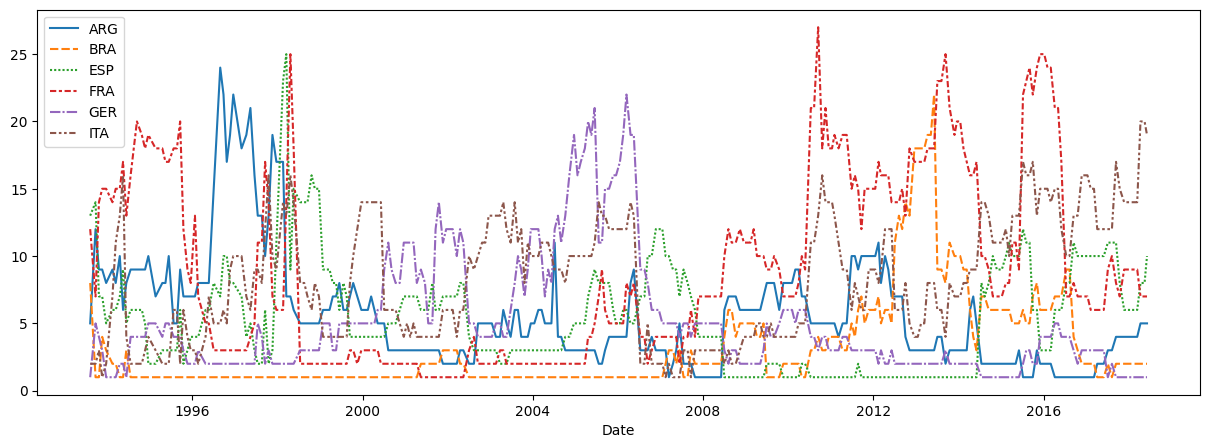

In [14]:
# Set the width and height of the figure
plt.figure(figsize=(15,5))

# Line chart showing how FIFA rankings evolved over time
sns.lineplot(data=fifa_data)

plt.savefig("Historical-fifa-ranking.png")

# F) Beautify the plot

You can modify and add multiple elements of a digramm/plot using all the features and functions of the *matplotlib* library underlying the easy to use *seaborn* visualization librery!


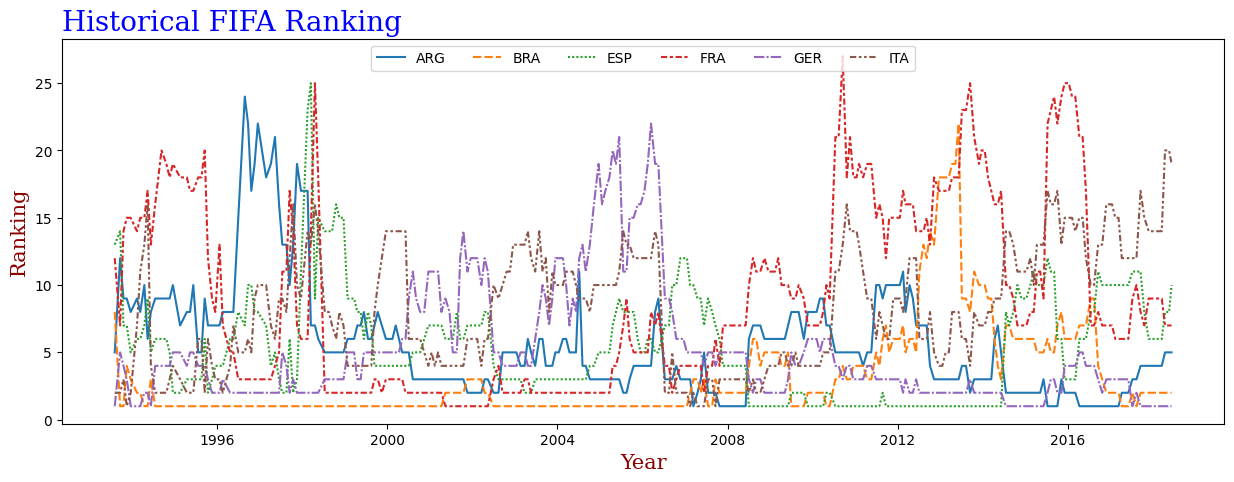

In [15]:
# Plot the data with additional Matplotlib settings
plt.figure(figsize=(15,5))

# set fonty style for title and legends
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

# Line chart showing how FIFA rankings evolved over time
sns.lineplot(data=fifa_data)

# plot a diagram title
plt.title("Historical FIFA Ranking", loc = 'left', fontdict = font1)

# add axis label text
plt.xlabel("Year", fontdict = font2)
plt.ylabel("Ranking", fontdict = font2)

# add and position a legend box
plt.legend(ncol=6, loc='upper center')

plt.show()

# G) Explore the dataset visually

You can select columns or filter rows using different visualization diagram types to explore the original dataset

### show only **selected** countries

In [32]:
nat1 = input("First Nation?")
nat2 = input("Second Nation?")

First Nation?ARG
Second Nation?FRA


In [33]:
print(nat1, nat2)

ARG FRA


In [34]:
# sample_data = fifa_data

# compare ARG vs FRA
sample_data = fifa_data[[nat1,nat2]]


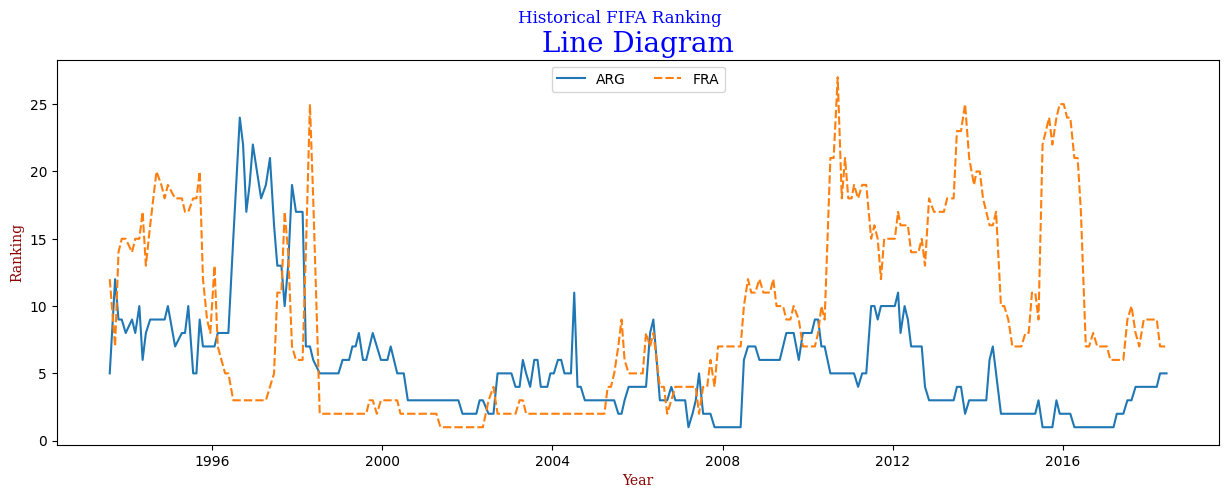

In [35]:
# set plot figure size
plt.figure(figsize=(15,5))

# set fonty style for title and legends
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':10}

# Line chart showing how FIFA rankings evolved over time
sns.lineplot(data=sample_data)

# plot a diagram title
plt.title("Line Diagram", loc = 'center', fontdict = font1)
plt.suptitle("Historical FIFA Ranking", fontdict = font1)

# add axis label text
plt.xlabel("Year", fontdict = font2)
plt.ylabel("Ranking", fontdict = font2)

# add and position a legend box
plt.legend(ncol=3, loc='upper center')

plt.show()

### compare **pairs of countries** using scatterplot diagram

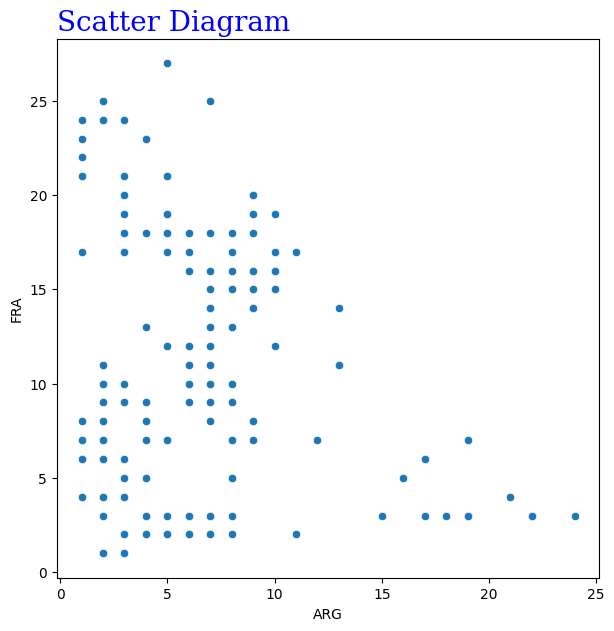

In [18]:
# set plot figure size
plt.figure(figsize=(7,7))

# Scatter (correlation) chart showing how FIFA rankings evolved over time
sns.scatterplot(x="ARG", y="FRA", data=fifa_data)

# plot a diagram title
plt.title("Scatter Diagram", loc = 'left', fontdict = font1)

plt.show()

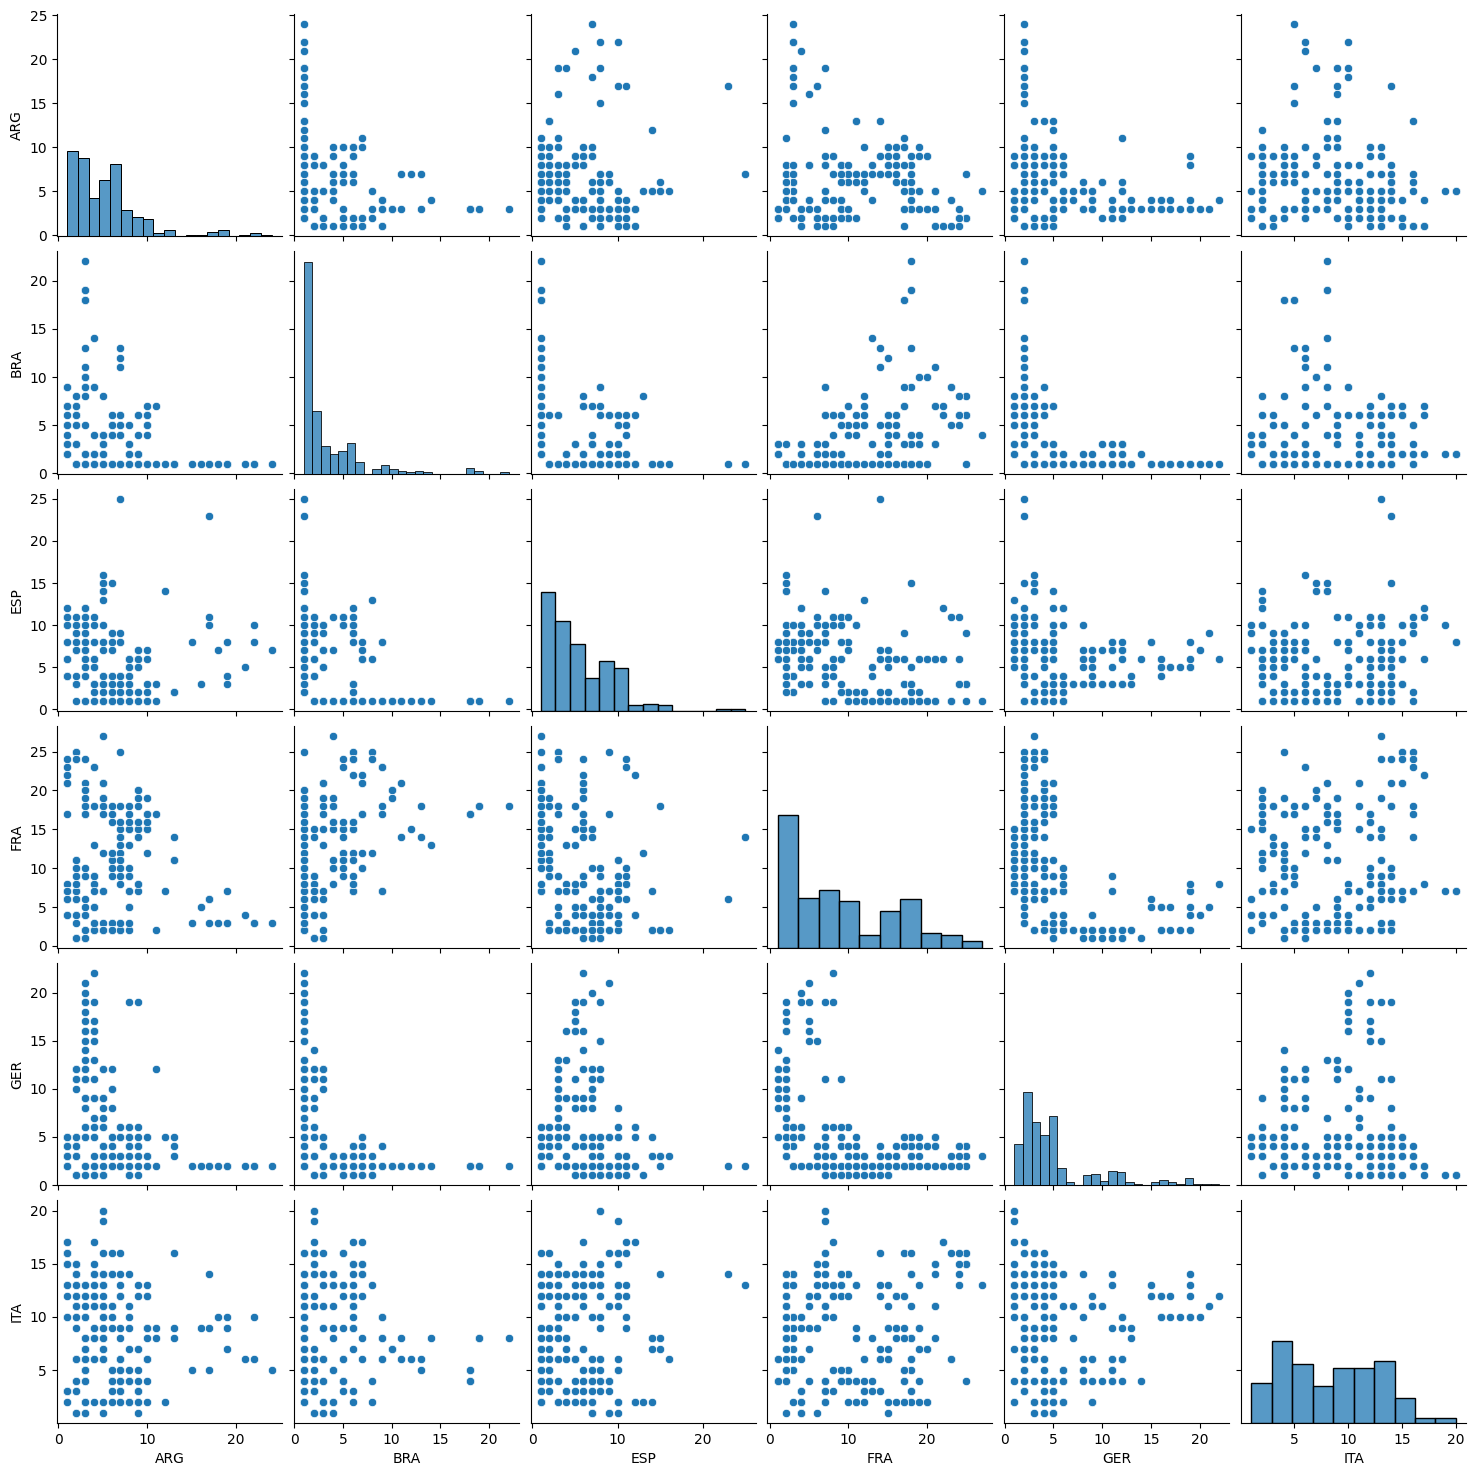

In [19]:
# pairwise Scatter diagram
fig = sns.pairplot(data=fifa_data)

plt.show()

### plot the key descriptive statistics measures using **boxplot** (*Box Whisker*) diagram

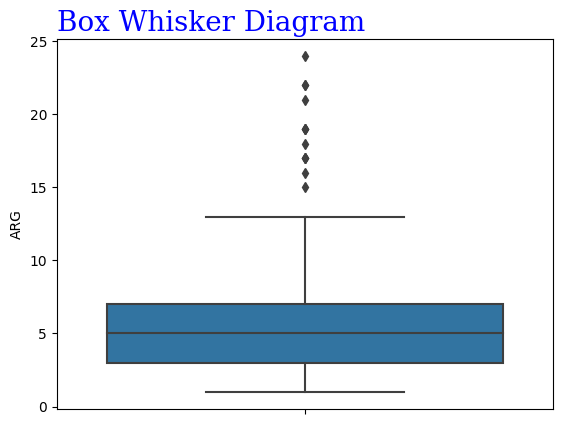

In [20]:
# Box Whisker diagram
sns.boxplot( y=fifa_data["ARG"])

# plot a diagram title
plt.title("Box Whisker Diagram", loc = 'left', fontdict = font1)

plt.show()

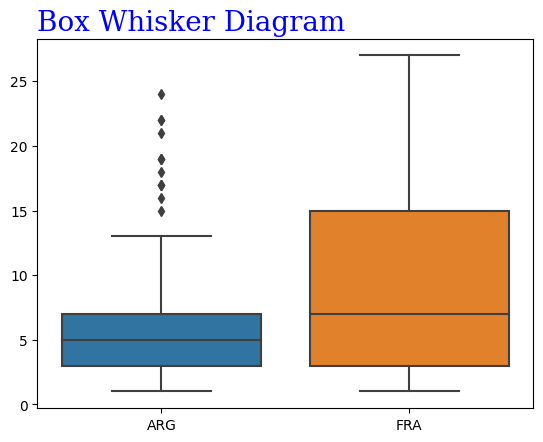

In [21]:
# multiple Box Whisker diagram
sns.boxplot(data=fifa_data, order=['ARG','FRA'])

# plot a diagram title
plt.title("Box Whisker Diagram", loc = 'left', fontdict = font1)

plt.show()

In [22]:
print(fifa_data.columns.tolist())

['ARG', 'BRA', 'ESP', 'FRA', 'GER', 'ITA']


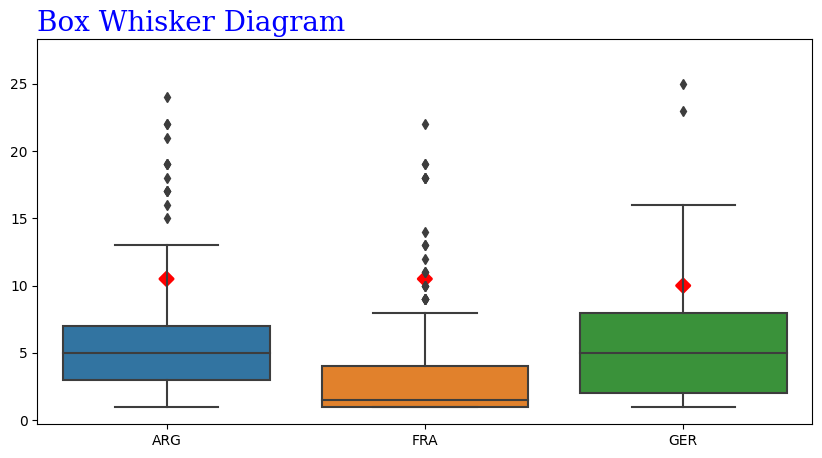

In [23]:
# set plot figure size
plt.figure(figsize=(10,5))

# multiple Box Whisker diagram
sns.boxplot(data=fifa_data, order=fifa_data.columns.tolist())

sns.pointplot(data=df, join=False, markers ='D', color='red')

# plot a diagram title
plt.title("Box Whisker Diagram", loc = 'left', fontdict = font1)

plt.show()

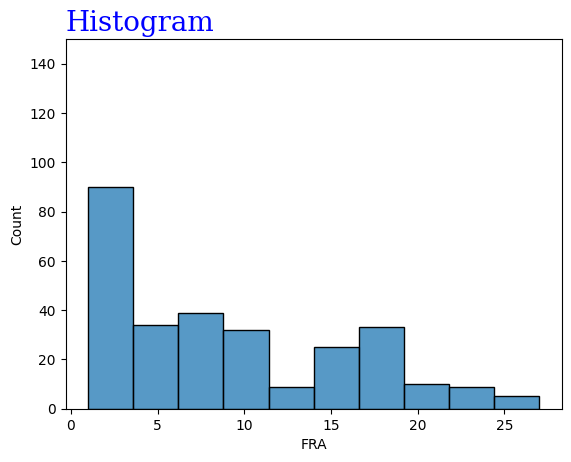

In [24]:
# Histogram diagram
sns.histplot(data=fifa_data, x="FRA")

# playing with different bin sizes
# sns.histplot(data=fifa_data, x="FRA", bins=5)

# plot a diagram title
plt.title("Histogram", loc = 'left', fontdict = font1)

# control y axe limits
plt.ylim(0, 150)

plt.show()

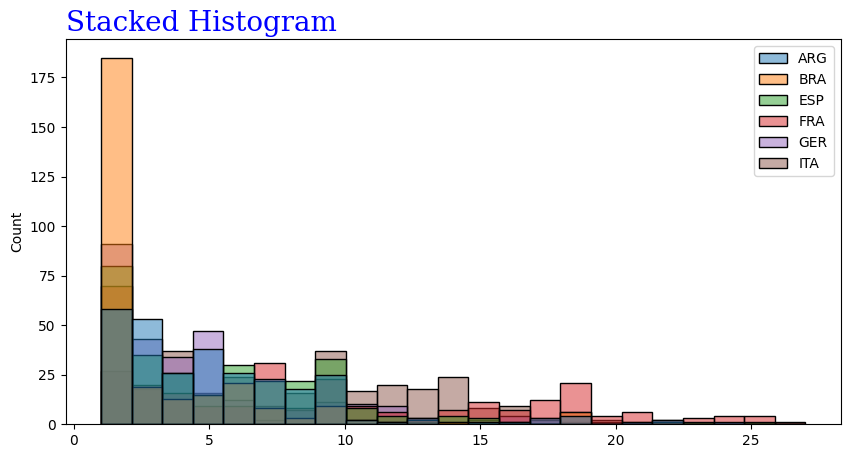

In [25]:
# set plot figure size
plt.figure(figsize=(10,5))

# stacked Histogram diagram
sns.histplot(data=fifa_data)

# plot a diagram title
plt.title("Stacked Histogram", loc = 'left', fontdict = font1)

plt.show()

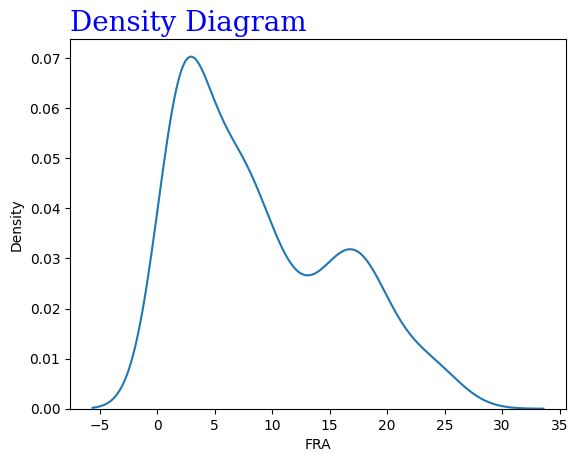

In [26]:
# Density diagram
sns.kdeplot(data=fifa_data, x="FRA")

# plot a diagram title
plt.title("Density Diagram", loc = 'left', fontdict = font1)

plt.show()

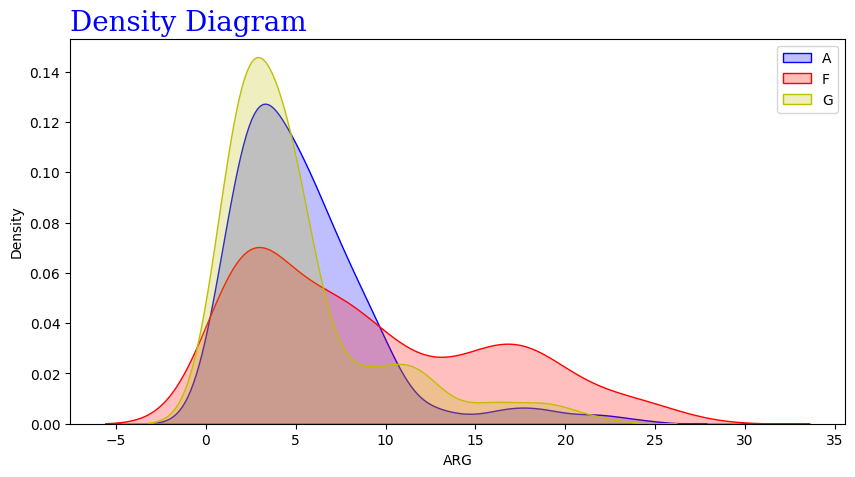

In [27]:
# set plot figure size
plt.figure(figsize=(10,5))

# multiple Density diagrams
fig = sns.kdeplot(data=fifa_data, x="ARG", fill=True, color="b")
fig = sns.kdeplot(data=fifa_data, x="FRA", fill=True, color="r")
fig = sns.kdeplot(data=fifa_data, x="GER", fill=True, color="y")

# plot a diagram title
plt.title("Density Diagram", loc = 'left', fontdict = font1)

plt.legend("AFG", loc='upper right')

plt.show()

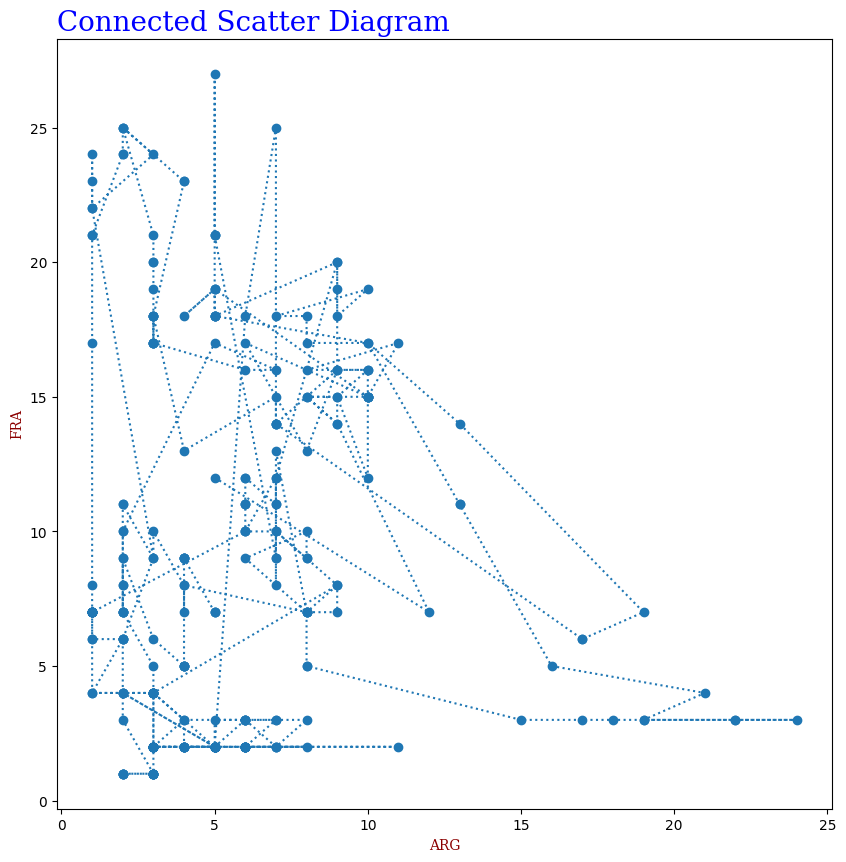

In [28]:
# set plot figure size
plt.figure(figsize=(10,10))

# connected Scatter diagram
plt.plot('ARG', 'FRA', data=fifa_data, linestyle='dotted', marker='o')

# plot a diagram title
plt.title("Connected Scatter Diagram", loc = 'left', fontdict = font1)

# add axis label text
plt.xlabel("ARG", fontdict = font2)
plt.ylabel("FRA", fontdict = font2)

plt.show()